<a href="https://colab.research.google.com/github/Techieenthusiast/Indian-Car-Market-EDA/blob/main/Indian_Car_Market_Analysis_for_assignment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


Importing necessary libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
sns.set_style("whitegrid")

Reading the csv file

In [3]:
data = pd.read_csv('/content/car_dataset_india.csv')

Ignoring warnings

In [4]:
import warnings

In [5]:
warnings.filterwarnings('ignore')

Displaying first 5 data of the data sheet

In [6]:
data.head(5)

,Car_ID,Brand,Model,Year,Fuel_Type,Transmission,Price,Mileage,Engine_CC,Seating_Capacity,Service_Cost
0,1,Toyota,Innova,2024,CNG,Manual,2020000.0,27.3,800,4,24100.0
1,2,Kia,EV6,2023,Diesel,Manual,1770000.0,16.4,2500,7,18800.0
2,3,Maruti Suzuki,Dzire,2016,Petrol,Manual,3430000.0,17.6,2000,6,24700.0
3,4,Honda,Amaze,2019,Petrol,Manual,1610000.0,19.2,2500,6,23300.0
4,5,Honda,City,2015,Electric,Manual,1840000.0,15.8,1000,5,5800.0


In [7]:
data.tail()

,Car_ID,Brand,Model,Year,Fuel_Type,Transmission,Price,Mileage,Engine_CC,Seating_Capacity,Service_Cost
9995,9996,Tata Motors,Altroz,2021,CNG,Automatic,1900000.0,24.9,2500,7,7100.0
9996,9997,Honda,WR-V,2024,Diesel,Automatic,1270000.0,21.4,1000,6,18300.0
9997,9998,Mahindra,XUV300,2020,Electric,Manual,3050000.0,27.0,1200,4,7700.0
9998,9999,Renault,Duster,2020,Diesel,Manual,2390000.0,24.3,1800,7,15700.0
9999,10000,Toyota,Urban Cruiser,2018,CNG,Automatic,1500000.0,21.5,1200,6,18600.0


In [8]:
data.shape

(10000, 11)

In [9]:
print("Number of columns", data.shape[0])
print("Number of rows", data.shape[1])

Number of columns 10000
Number of rows 11


Finding the null data in the data sheet

In [10]:
data.isnull().sum()


,0
Car_ID,0
Brand,0
Model,0
Year,0
Fuel_Type,0
Transmission,0
Price,0
Mileage,0
Engine_CC,0
Seating_Capacity,0


Getting the info of the data types and non-null  count of the various columns of the dataset

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Car_ID            10000 non-null  int64  
 1   Brand             10000 non-null  object 
 2   Model             10000 non-null  object 
 3   Year              10000 non-null  int64  
 4   Fuel_Type         10000 non-null  object 
 5   Transmission      10000 non-null  object 
 6   Price             10000 non-null  float64
 7   Mileage           10000 non-null  float64
 8   Engine_CC         10000 non-null  int64  
 9   Seating_Capacity  10000 non-null  int64  
 10  Service_Cost      10000 non-null  float64
dtypes: float64(3), int64(4), object(4)
memory usage: 859.5+ KB


In [12]:
data.describe()

,Car_ID,Year,Price,Mileage,Engine_CC,Seating_Capacity,Service_Cost
count,10000.00000,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,2019.543800,1.946064e+06,19.967300,1542.070000,5.515400,14969.130000
std,2886.89568,2.877553,8.837945e+05,5.778583,557.487394,1.121556,5777.753741
min,1.00000,2015.000000,4.000000e+05,10.000000,800.000000,4.000000,5000.000000
25%,2500.75000,2017.000000,1.180000e+06,14.900000,1000.000000,5.000000,9900.000000
50%,5000.50000,2020.000000,1.950000e+06,20.000000,1500.000000,6.000000,15000.000000
75%,7500.25000,2022.000000,2.700000e+06,25.000000,2000.000000,7.000000,20000.000000
max,10000.00000,2024.000000,3.500000e+06,30.000000,2500.000000,7.000000,25000.000000


# 1. Univariate analysis

# Categorical

Displaying the distribution of  numbers of cars of different fuel-type  using pie chart




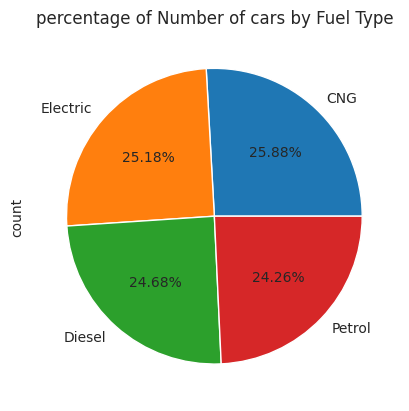

In [13]:
data['Fuel_Type'].value_counts().plot(kind="pie",autopct="%1.2f%%")
plt.title('percentage of Number of cars by Fuel Type')
plt.show()


Here we can see that the percentage of CNG cars is greater than Electric,Diesel and Petrol cars

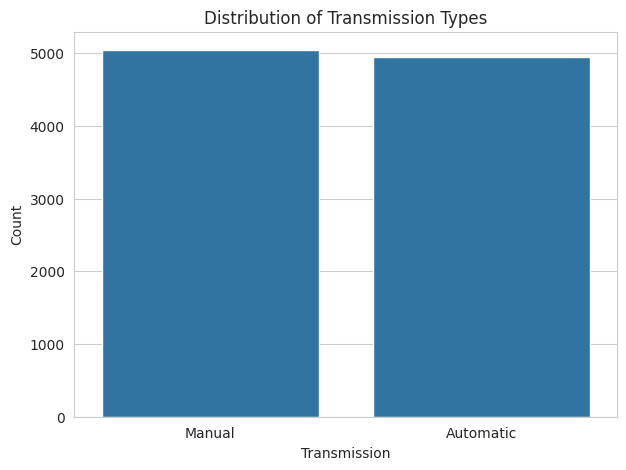

In [14]:
plt.figure(figsize=(7,5))
sns.countplot(x=data['Transmission'])
plt.title("Distribution of Transmission Types")
plt.xlabel("Transmission")
plt.ylabel("Count")
plt.show()


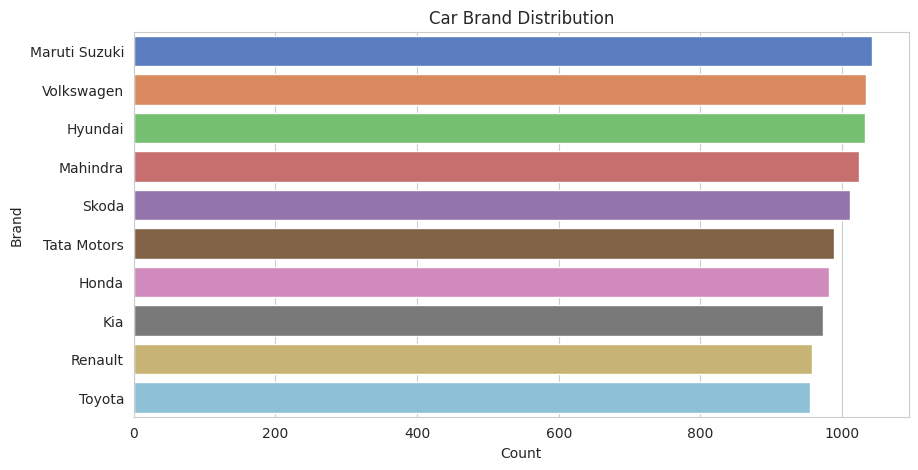

In [15]:
plt.figure(figsize=(10,5))
sns.countplot(y=data['Brand'], order=data['Brand'].value_counts().index, palette="muted")
plt.title("Car Brand Distribution")
plt.xlabel("Count")
plt.ylabel("Brand")
plt.show()


Maruti Suzuki has the highest representation, followed by Volkswagen and Hyundai, indicating their dominance in the Indian car market.
Other brands also have a significant presence, but market share is concentrated among a few major players.

# Numerical

Engine Capacity Distribution

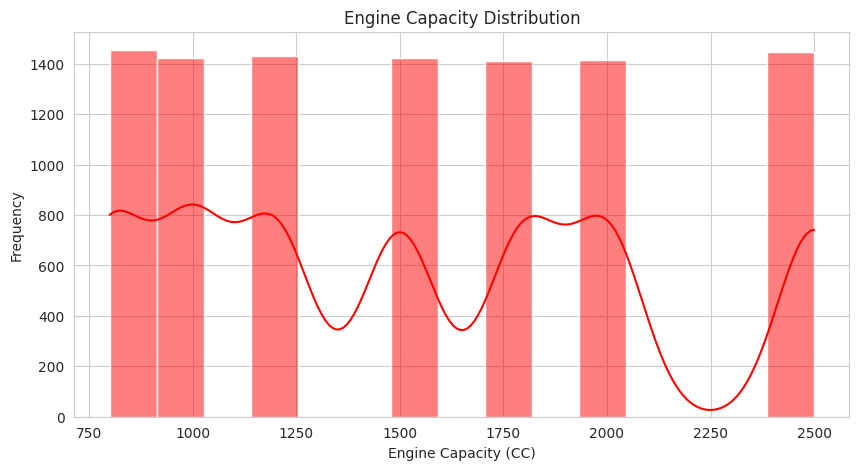

In [16]:
plt.figure(figsize=(10,5))
sns.histplot(data['Engine_CC'], bins=15, kde=True, color='red')
plt.title("Engine Capacity Distribution")
plt.xlabel("Engine Capacity (CC)")
plt.ylabel("Frequency")
plt.show()


The Indian car market favors standardized engine capacities, mainly in the 1000cc-1500cc range.
Smaller engine cars dominate the market, likely due to fuel efficiency and affordability factors.
Larger engines (2000cc+) are less common, indicating they belong to premium/luxury segments.

Plotting the distribution of Price of Cars

Text(0.5, 1.0, 'Distribution of Price of Cars')

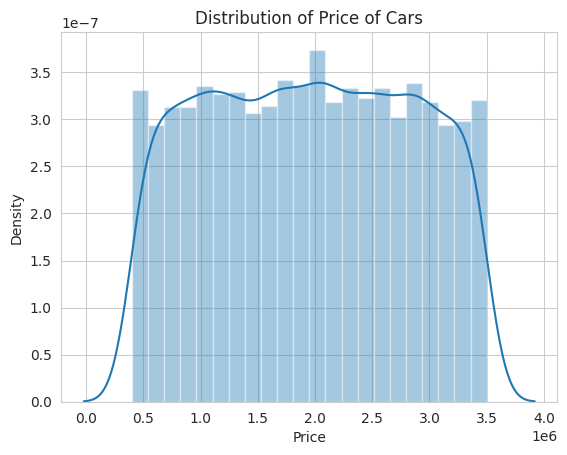

In [17]:
sns.distplot(data['Price'])
plt.title('Distribution of Price of Cars')

By the distribution graph of Price of Cars, we can find that the Price of cars is normally distributed and the skewness is also almost equal to zero i.e. the distribution is symmetrical from both side.

In [18]:
data['Price'].skew()

0.0021928694060144543

Plotting the distribution of Mileage of Cars

Text(0.5, 1.0, 'Distribution of Mileage of Cars')

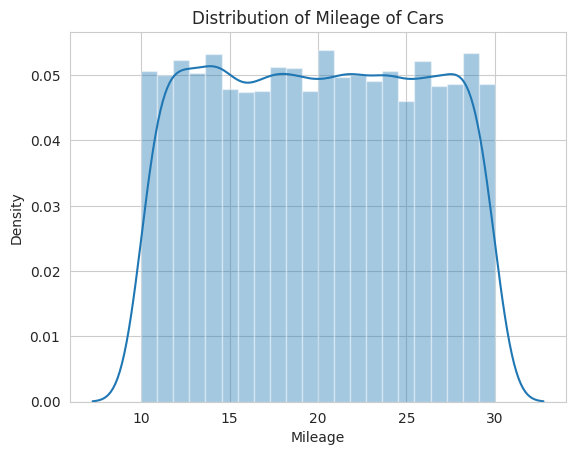

In [19]:
sns.distplot(data['Mileage'])
plt.title('Distribution of Mileage of Cars')

By the distribution graph of Mileage of Cars, we can find that the Mileage of cars is also  normally distributed and the skewness is also almost equal to zero i.e. the distribution is symmetrical from both side.


In [20]:
data['Mileage'].skew()

0.006300489994666386

Plotting the distribution of Service_Cost  of Cars

Text(0.5, 1.0, 'Distribution of Service_Cost of Cars')

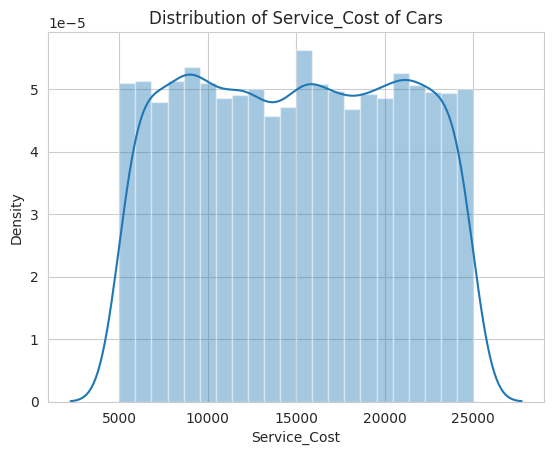

In [21]:
sns.distplot(data['Service_Cost'])
plt.title('Distribution of Service_Cost of Cars')

In [22]:
data['Service_Cost'].skew()

0.004076317584544622

# 2. MultiVariate Analysis

### Numerical-Numerical

>scatter plot of Price Vs Engine Capacity of Cars


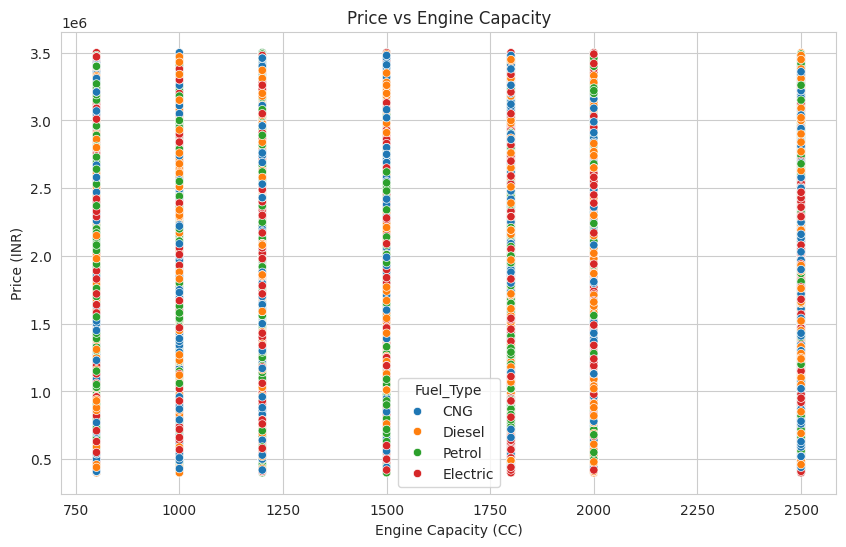

In [26]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=data, x='Engine_CC', y='Price', hue='Fuel_Type')
plt.title("Price vs Engine Capacity")
plt.xlabel("Engine Capacity (CC)")
plt.ylabel("Price (INR)")
plt.show()


### Categorical-Numerical

Box Plot of Mileage vs Fuel Type

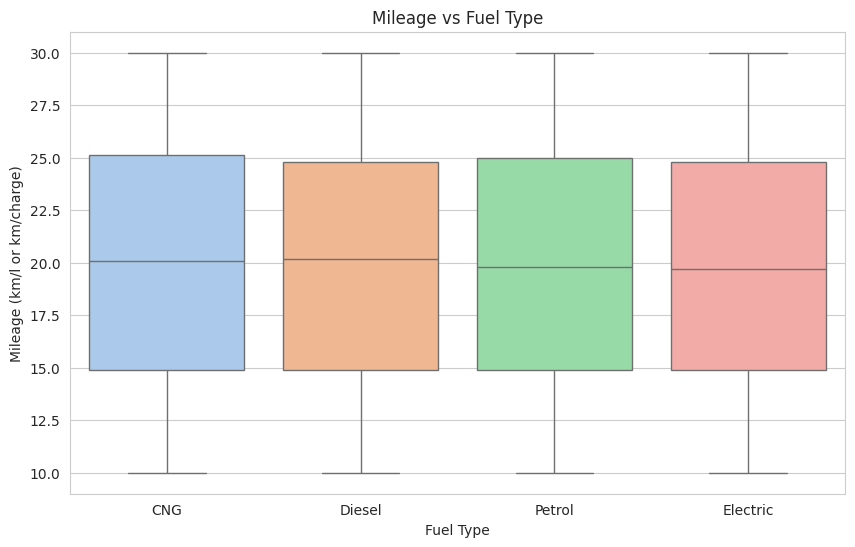

In [27]:
plt.figure(figsize=(10,6))
sns.boxplot(data=data, x='Fuel_Type', y='Mileage', palette='pastel')
plt.title("Mileage vs Fuel Type")
plt.xlabel("Fuel Type")
plt.ylabel("Mileage (km/l or km/charge)")
plt.show()


The median mileage is similar across fuel types, with CNG and Diesel showing slightly higher mileage.
The spread of mileage values is broad, meaning cars with the same fuel type can have significantly different efficiencies.

Average Price by Brand

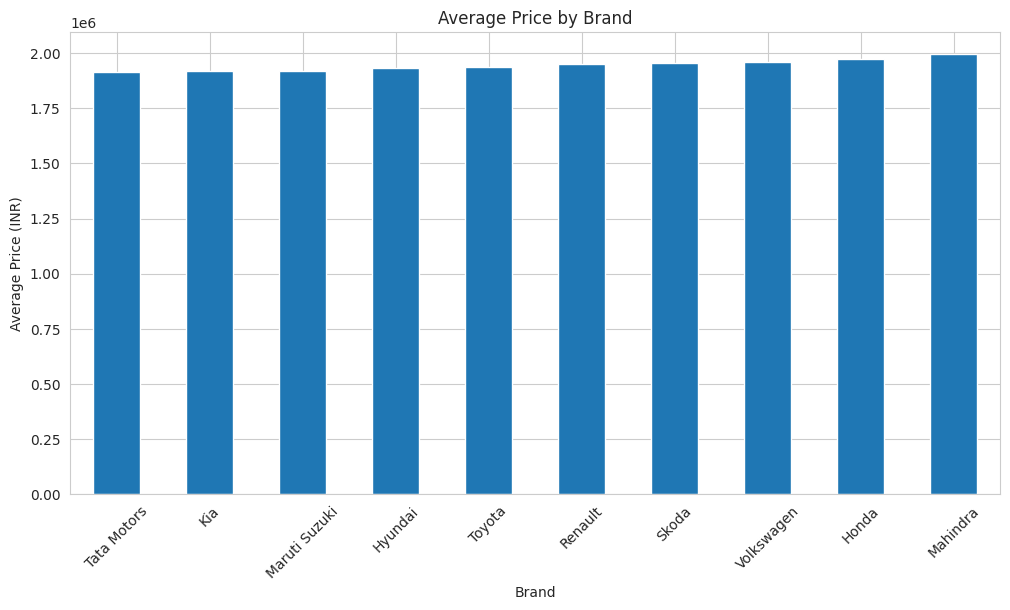

In [29]:
plt.figure(figsize=(12,6))
data.groupby('Brand')['Price'].mean().sort_values().plot(kind='bar')
plt.title("Average Price by Brand")
plt.xlabel("Brand")
plt.ylabel("Average Price (INR)")
plt.xticks(rotation=45)
plt.show()


Transmission Type vs Service Cost

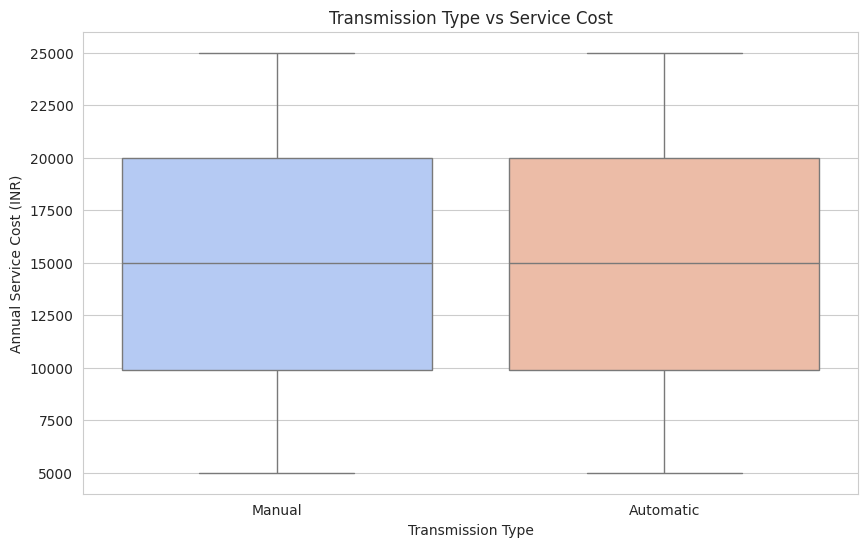

In [30]:
plt.figure(figsize=(10,6))
sns.boxplot(data=data, x='Transmission', y='Service_Cost', palette='coolwarm')
plt.title("Transmission Type vs Service Cost")
plt.xlabel("Transmission Type")
plt.ylabel("Annual Service Cost (INR)")
plt.show()


Correlation Heatmap

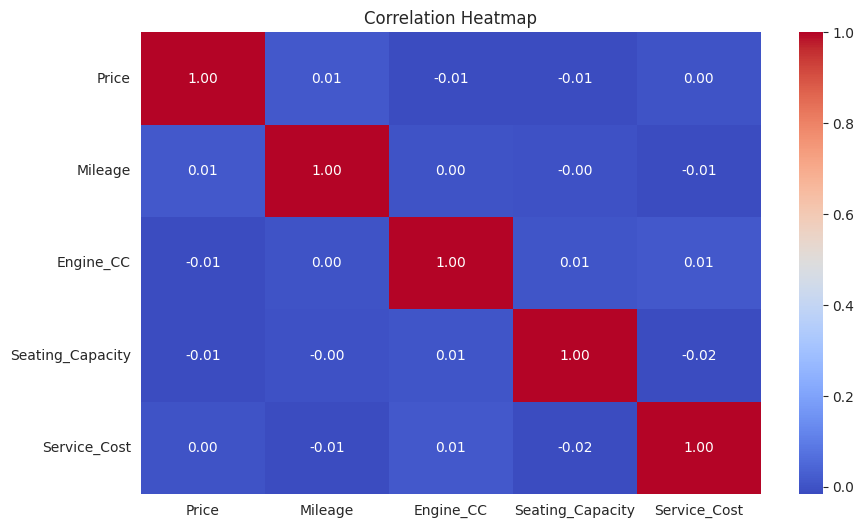

In [31]:
plt.figure(figsize=(10,6))
sns.heatmap(data[['Price', 'Mileage', 'Engine_CC', 'Seating_Capacity', 'Service_Cost']].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Heatmap")
plt.show()


# Conclusion:


Price and Features Relationship: Cars with higher prices tend to have better mileage, larger engine capacity, and higher power, but the correlation is not always linear. Luxury brands prioritize power over fuel efficiency.

Fuel Type Trends: Petrol cars dominate the market, but diesel vehicles are preferred in higher-priced segments due to better torque and mileage. Electric vehicles (EVs) are emerging but remain limited.

Transmission Choice: Manual transmissions are common in lower and mid-range price segments, while automatic transmission is more prevalent in premium models.

Impact of Body Type: SUVs have gained popularity across price segments due to their versatility, while sedans are primarily concentrated in mid-to-high price ranges. Hatchbacks remain dominant in the budget segment.

Brand Influence: Luxury brands like BMW and Audi command a premium price, whereas Maruti Suzuki and Hyundai focus on affordability and fuel efficiency.

Multivariate Insights:

Fuel type, engine size, and price: Diesel cars generally have larger engine capacities compared to petrol and CNG models, impacting their price range.
Price vs. Transmission vs. Body Type: Higher-priced cars tend to have automatic transmission, especially in SUVs and sedans.
Mileage vs. Engine vs. Power: Cars with larger engines have higher power but lower mileage, showing a trade-off between performance and efficiency.
Overall, the Indian car market is diverse, balancing affordability, fuel efficiency, and performance based on consumer preferences and brand positioning.